<a href="https://colab.research.google.com/github/mario-i-caicedo-ai/Python_Minicurso/blob/main/Cuadernos_Jupyter/AA_KMEANS_IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/4/49/Iris_germanica_%28Purple_bearded_Iris%29%2C_Wakehurst_Place%2C_UK_-_Diliff.jpg/376px-Iris_germanica_%28Purple_bearded_Iris%29%2C_Wakehurst_Place%2C_UK_-_Diliff.jpg'></center>
	

# <center>Agrupamiento por KMEANS:</center> 

## <center>el IRIS DATA SET como ejemplo</center>


El objetivo de este cuaderno consiste en aplicar el algoritmo de agrupación (clustering)  [KMEANS](https://en.wikipedia.org/wiki/K-means_clustering) a un conjunto de datos. Con este fin, utilizaremos la biblioteca [scikit-learn](https://scikit-learn.org/stable/) (también conocida como **sklearn**)

En 1936, Ronald Fisher publicó un artículo titulado: 

*The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis*

En el este célebre trabajo, Fisher introduce un conjunto de datos conocidos actualmente como el IRIS DATA SET, que consta de 50 muestras de cada una de las tres especies de la flor Iris (Iris setosa, Iris virginica e Iris versicolor). Para cada muestra se midieron cuatro (4) características, el largo y el ancho de los sépalos y pétalos, en centímetros. Basado en la combinación de estas cuatro características. Fisher tuvo éxito en su empresa y consiguió desarrollar un modelo discriminante lineal para distinguir las especies entre sí.

Hoy día, el IRIS DATA set se utiliza en cursos de estadísitica y de aprendizaje automático. De hecho, el conjunto de datos está incluído entre los datasets estándar tanto en la biblioteca para Python *sklearn* como en R.

Tambiés es posible descargar el data set de diversas fuentes. 

* [Repositorio para Aprendizaje Automático de la Universidad de California en Irvine](https://archive.ics.uci.edu/ml/index.php)

* [Iris Flower Data Set](https://en.wikipedia.org/wiki/Iris_flower_data_set). Por cierto, obtner la tabla de datos usando la biblioteca [beautifulsoup](https://pypi.org/project/beautifulsoup4/) es un lindo ejercicio de mineria de datos en la web [webscraping](https://en.wikipedia.org/wiki/Web_scraping).

* Es muy interesante mencionar el libro [A Handbook of Small Data Sets
](https://books.google.com.co/books/about/A_Handbook_of_Small_Data_Sets.html?id=m4O1DwAAQBAJ&printsec=frontcover&source=kp_read_button&hl=en&redir_esc=y#v=onepage&q&f=false) de By David J. Hand, Fergus Daly, K. McConway, D. Lunn, E. Ostrowski. Un compendio de tablas muy útiles para estudiar estadísitica. Las tablas de datos del texto pueden descargarse del siguiente [enlace](https://www2.stat.duke.edu/courses/Spring09/sta114/114data.html)

* A diferencia de lo que se hace en la mayor parte de los ejemplos que usted encontrará en la red, no utilizaremos los datos almacenados en la biblioteca scikit-learn. En lugar de esto, los datos se descagarán de la web en domnde típicamente aparecen como [name].DAT, habrá que convertirles a una tabla [csv](https://en.wikipedia.org/wiki/Comma-separated_values) y añadir los nombres de las columnas (que no se encuentran en los archivos originales)  

## Una nota fundamental:

El algoritmo KMEANS crea los agrupamientos buscando centros de grupos y midiendo la distancia entre cada unto (muestra) y dichos centros. La noción de distancia que se utiliza es la euclídea en el espacio de atributos.

La dstancia euclídea solo tiene sentido si todos los atributos son de las mismas dimensiones, es por ello y no por la escala de valores en los atributos que es necesario reescalarles para hacerles adimensionales.

En el problema de clasificación IRIS todos los atributos están medidos en cm y sn de escala comparable y por ende no hay que llevar a caboi escalamiento alguno

## Bibliotecas requeridas para estudiar el problema

* pandas. Para manejar los datos.
* matplotlib. Graficación.
* seaborn. Visualización elegante basada en matplotlib.
* sklearn. Biblioteca estándar de aprendizaje automático (Machine Learning)

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.cluster import KMeans/content/gdrive/My Drive/Colab Notebooks/Handbook-of-Small-Data-Sets-DATA_FILES

## FASE I

### Preparación para lectura de datos (se supone que los archivos están almacenados en su google drive)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls

gdrive	sample_data


In [ ]:
%cd /content/gdrive/My Drive/Colab Notebooks/Handbook-of-Small-Data-Sets-DATA_FILES

/content/gdrive/My Drive/Colab Notebooks/Handbook-of-Small-Data-Sets-DATA_FILES


In [ ]:
!ls IR*

IRISES.csv  IRISES.DAT	IRON.DAT


In [ ]:
!ls ir*

iris.csv


---------------------------------------------------------------
## FASE II

Importando los datos de UCI.

* Nota, al bajar los datos del repositorio se obtiene un archivo denominado **iris.dat**, al examinarlo con algún editor de texto notará que 
  * Las columnas carecen de nombre
  * Los datos están separados por comas.
* Si decide subir el archivo a su google drive, deberá usar el comando (recuerde que en colab está corriendo una máquina con Linux como SO): 
<center>!mv iris.dat iris.csv</center>
este comando cambiará la extensión del archivo para hacerle adecuado para su lectura con pandas, además, de eso, al leer el archivo, tendrá que **explicitar** que el separador es la coma (,)

* Lectura del archivo **csv**
* Pandas lo convierte en un DataFrame
* Por favor note la palabra clave **sep** para definir el separador. 

In [ ]:
IRIS=pd.read_csv('iris.csv',sep=',',header=None)

## FASE III 

Preparación del DataFrame

El despliegue de las primeras líneas del DataFrame muestran la ausencia de los nombres de columna.

In [ ]:
IRIS.head(2)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


Los nombres de columna se pueden incluir en una lista y se añaden al DataFrame con el método **columns**

In [ ]:
Columnas=['SL','SW','PL','PW','Variedad']
IRIS.columns=Columnas

* Despliegue de las últimas filas del DataFrame luego de haber incluido los nombres de columna.
* Note que los datos ya están clasificados, sin embargo, la etiqueta es alfanumérica lo que lo complica su uso para el agrupamiento.

In [ ]:
IRIS.tail()

,SL,SW,PL,PW,Variedad
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


* Debido al problema con la etiqueta, es necesario definir una neva etiqueta numérica.

* La etiqueta numérica se define a través de una función  (**categorise**) que asigna un valor numérico  (0,1,2) a cada una de las clases, esta cantidad se incluirá en una nueva columna del DataFrame.

In [ ]:
def categorise(row):  
    if row['Variedad'] =='Iris-setosa':
        return(0)
    elif row['Variedad'] =='Iris-versicolor':
        return(1)
    else :
        return(2)

Acá creamos una nueva columna con la etiqueta numérica.

Los elementos de la columna se rellenan con una función anónima 

In [ ]:
IRIS['Clase'] = IRIS.apply(lambda row: categorise(row), axis=1)

In [ ]:
# Si desea observar un elemento del data frame retire el comentario
# de la siguiente línea de código. Si quiere examninar un sector del DataFrame tiene 
# que modificasr la línea y retirar el comentario

# IRIS.iloc[40] 

### **Una nota importante**

La siguiente línea de código reordena las filas del dataframe,
en este caso. frac=1 hace un reordenamiento al azar.

Para este estudio, el reonrdenamioento es totalmente innecesario, sin embaro, si tratáramos con otro tipo de modelo, una regresión, por ejemplo. Este paso ser´{ia fundamental (**¿por qué**?) 

In [ ]:
IRIS=IRIS.sample(frac=1)

## FASE IV

Exploración de los Datos.

Si usted está leyendo este cuaderno, seguramente ya sabe que  todo trabajo de ciencia de datos debe comenzar por un estudio exploratorio de los datos. 

### Ejercicio $\#1$

* En este caso, nos limitaremos a examinar histogramas de las cantidades medidas (atributos) de las muestras. 

* Los resultados sugieren que las distribuciones son multimodales, esto es obviamebnte consistente con la existencia de tres clases de Iris.

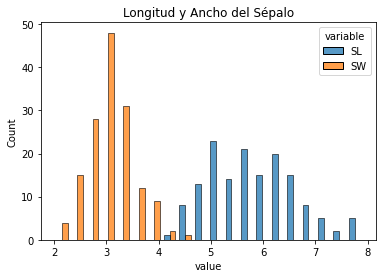

In [ ]:
# plot melted dataframe in a single command
fig=sns.histplot(IRIS[['SL','SW']].melt(),x='value', hue='variable',
             multiple='dodge', shrink=.75, bins=20).set(title='Longitud y Ancho del Sépalo');


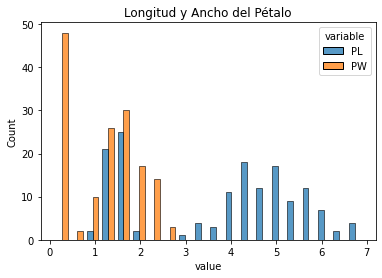

In [ ]:
fig=sns.histplot(IRIS[['PL','PW']].melt(),x='value', hue='variable',
             multiple='dodge', shrink=.75, bins=20).set(title='Longitud y Ancho del Pétalo');

In [ ]:
# Si desea ver la forma de obtener un histograma sin invocar ningún móduolo diferente a pandas, 
#retire el comentario de la siguiente línea de código.

# hist = IRIS.hist(column='PW') #bins=3

### Ejercicio $\#2$

* El siguiente ejercicio consiste en examinar graficos de cruce (crossplots) de las varialbes (atributos). 

* Esta vez no se ve una clara separación en dos grupos, lo que da pie a pensar que la clasificación quizá resulta factible. 

Text(0, 0.5, 'Ancho del Sépalo')

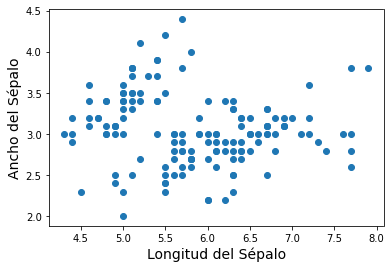

In [ ]:
plt.scatter(IRIS['SL'], IRIS['SW'],cmap='gist_rainbow')
plt.xlabel('Longitud del Sépalo', fontsize=14)
plt.ylabel('Ancho del Sépalo', fontsize=14)

Text(0, 0.5, 'Ancho del Pétalo')

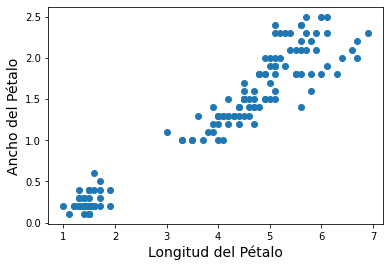

In [ ]:
plt.scatter(IRIS['PL'], IRIS['PW'],cmap='gist_rainbow')
plt.xlabel('Longitud del Pétalo', fontsize=14)
plt.ylabel('Ancho del Pétalo', fontsize=14)

### Ejercicio $\#3$ 

En este nuevo ejercicio, utilizamos la clasificación original que viene con los datos para colorear los puntos en los crossplots. Cada color corresponde a una de las tres clases. 

Evidentemente una de las clases se separa totalmente de las otras dos, y hay una cierta superposición entre las otras dos clases.

In [ ]:
clase=[] # Esta lista se utiliza para colorear los puntos de los crossplots
clase=IRIS['Clase']

Text(0, 0.5, 'Grosor del sépalo')

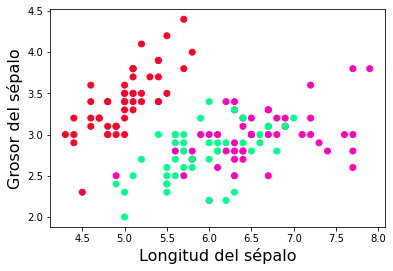

In [ ]:
plt.scatter(IRIS['SL'], IRIS['SW'], c=clase, cmap='gist_rainbow') # El parámetro c aplica colores según los índices dados por y
plt.xlabel('Longitud del sépalo', fontsize=16)
plt.ylabel('Grosor del sépalo', fontsize=16) # Sepal Width

Text(0, 0.5, 'Abcho del del Pétalo')

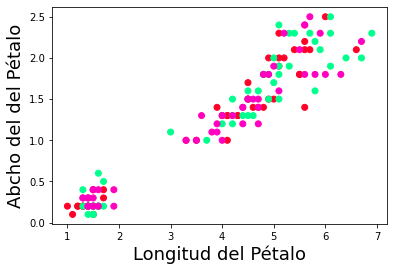

In [ ]:
plt.scatter(IRIS['PL'], IRIS['PW'], c=yy, cmap='gist_rainbow')
plt.xlabel('Longitud del Pétalo', fontsize=18)
plt.ylabel('Abcho del del Pétalo', fontsize=18)

## FASE V

## **El Modelo**

UNa vez que estamos razonablemente convencidos de que los dato se agrupan, efectivaente, en tres categorias, es el momento de estudiar su clasificación a través de KMEANS. 

Creamos un DataFrame sin la clasificación alfanumerica y manteneos la categorías numéricas por si en algún momento quisieramos comparar.

In [ ]:
IRIS_KM=IRIS[['SL','SW','PL','PW','Clase']]

* Al invocar el módulo de KMEANS paracrear el modelo, proponemos a priori la existencia de tres grupos (clusters). 

* En verdad ya sabemos que debe haber tres grupos, pero todo sea por la pedagogía.

* Nótese que el agrupamiento se hace sobre los predictores **SIN** incluir la clase, es debido a esto que KMEANS es un algoritmo de aprendizaje **no supervisado**

## Creación del **MODELO**

* En este caso, el modelo no es otra cosa que el conjunto de centros de los grupos y sus radios.
* Bautizamos a nuestro modelo como: **km**

In [ ]:
# Una forma de crear el modelo es en dos líneas de código

#km = KMeans(n_clusters = 3, n_init = 4, random_state=21)
#km.fit(IRIS_KM[['SL','SW','PL','PW']])

# pero un verdadero Pytonista encuentra más elegante hacer todo enb una sola líunea de código
km = KMeans(n_clusters = 3, n_init = 4, random_state=21).fit(IRIS_KM[['SL','SW','PL','PW']])

km contene, ente otras cosas, los centros de los tres clusters.

In [ ]:
# Acá asignamos los centro de los tres grupos a la variable 
# center que resulta ser una lista de listas

centers = km.cluster_centers_ 

# Uno de los tres centros tiene coordenadas:

print(centers[0])

[5.006 3.418 1.464 0.244]


In [ ]:
# km también contiene las etiquetas que asignó a cada una
# de las muestras de entrenamiento 
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

## Predicción: 

* Una predicción no es más queesto  la **clasificación** de datos *desconocidos*

* La clasificación/prediccion funciona de la siguiente manera: entegamos los atributos de una muestra desconocida al modelo y este retorna la etiqueta del cluster a quepertenece la muestra.  

* Para este ejercicio se crea un pequeño DataFrame (X) con datos de flores Iris que entregaremos a nuestro modelo (km) para la clasificación de sus elementos.

* **NOTA:** En este cuaderno (V1.0), X contiene datos que usamos para el entrenamiento mismo, no deberíamos hacer esto. En versiones futuras evitaré esta inconveniencia. 

In [ ]:
# Muestras y su clasificación

# 5.1	3.5	1.4	0.2 I Setosa
# 6.3	3.3	6.0	2.5	I Virginica
# 6.7	3.0	5.2	2.3	Iris-virginica	
#	6.7	3.0	5.0	1.7	I Versicolor
# 5.2 2.7 3.9 1.4 I Versicolor	

# Crearemos el DataFrame a patir de un diccionario:

DATOS={'SL':[5.1,6.3,6.7,6.7,5.2],
        'SW': [3.5,3.3,3.0,3.0,2.7],
        'PL':[1.4,6.0,5.2,5.0,3.9],
        'PW':[0.2,2.5,2.3,1.7,1.4]}

X=pd.DataFrame(DATOS,columns= ['SL','SW','PL','PW'])

## Resultados de la predicción

* El resultado se almacena en una lista (Prediccion) que contiene las etiquetas en el orden en que aparecen las muestras en X.

* Una de las muestras (¿cuál?) resultó mal clasificada.

In [ ]:
Prediccion=km.predict(X, sample_weight=None)
print(Prediccion)

[0 1 1 1 2]


## Es necesario introducir algunas métricas para evaluar el método de aprendizaje que se ha usado.

En esta primera verión del cuaderno, no mostraremos este paso fundamental

## Esto termina el análisi de los datos de la UCI

## Es tiempo de una nueva aventura

<center><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/e/e1/Ark_white_water1101.jpg/640px-Ark_white_water1101.jpg'></center>

----------------------------------------------------------------------
## Otra versión del conjunto de datos

En esta nueva parte del cuadeno repetiremos los mismos ejercicios, solo que esta vez utilizará los datos del texto [A Handbook of Small Data Sets
](https://books.google.com.co/books/about/A_Handbook_of_Small_Data_Sets.html?id=m4O1DwAAQBAJ&printsec=frontcover&source=kp_read_button&hl=en&redir_esc=y#v=onepage&q&f=false) de By David J. Hand, Fergus Daly, K. McConway, D. Lunn, E. Ostrowski. Que puede descargar de este [enlace](https://www2.stat.duke.edu/courses/Spring09/sta114/114data.html)

En el texto, la referencia está en la página 25.

* Este ejercicio tiene varios objetivos, entre otros:
    * Incluir celdas de texto en que usted explique cada paso que aparece en las celdas de código,
    * Destacar las diferencias (si es que hay) en los datos que descargó

**NOTA:** Haga énfasis en ¨los datos¨ y no en el código.

Al igual que se hizo antes, es necesario cambiar la extensión del archivo .dat

In [ ]:
df=pd.read_csv('IRISES.csv',sep='\t',header=None)

df.shape

(50, 12)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,5.1,3.5,1.4,0.2,7.0,3.2,4.7,1.4,6.3,3.3,6.0,2.5
1,4.9,3.0,1.4,0.2,6.4,3.2,4.5,1.5,5.8,2.7,5.1,1.9
2,4.7,3.2,1.3,0.2,6.9,3.1,4.9,1.5,7.1,3.0,5.9,2.1
3,4.6,3.1,1.5,0.2,5.5,2.3,4.0,1.3,6.3,2.9,5.6,1.8
4,5.0,3.6,1.4,0.2,6.5,2.8,4.6,1.5,6.5,3.0,5.8,2.2


In [ ]:
Medidas=['IS SL','IS SW','IS PL','IS PW',
        'IVe SL','IVe SW','IVe PL','IVe PW',
        'IVi SL','IVi SW','IVi PL','IVi PW']

In [ ]:
df.columns = Medidas

In [ ]:
df

,IS SL,IS SW,IS PL,IS PW,IVe SL,IVe SW,IVe PL,IVe PW,IVi SL,IVi SW,IVi PL,IVi PW
0,5.1,3.5,1.4,0.2,7.0,3.2,4.7,1.4,6.3,3.3,6.0,2.5
1,4.9,3.0,1.4,0.2,6.4,3.2,4.5,1.5,5.8,2.7,5.1,1.9
2,4.7,3.2,1.3,0.2,6.9,3.1,4.9,1.5,7.1,3.0,5.9,2.1
3,4.6,3.1,1.5,0.2,5.5,2.3,4.0,1.3,6.3,2.9,5.6,1.8
4,5.0,3.6,1.4,0.2,6.5,2.8,4.6,1.5,6.5,3.0,5.8,2.2
5,5.4,3.9,1.7,0.4,5.7,2.8,4.5,1.3,7.6,3.0,6.6,2.1
6,4.6,3.4,1.4,0.3,6.3,3.3,4.7,1.6,4.9,2.5,4.5,1.7
7,5.0,3.4,1.5,0.2,4.9,2.4,3.3,1.0,7.3,2.9,6.3,1.8
8,4.4,2.9,1.4,0.2,6.6,2.9,4.6,1.3,6.7,2.5,5.8,1.8
9,4.9,3.1,1.5,0.1,5.2,2.7,3.9,1.4,7.2,3.6,6.1,2.5


In [ ]:
I_Setosa=df[['IS SL','IS SW','IS PL','IS PW']]
I_Versicolor=df[['IVe SL','IVe SW','IVe PL','IVe PW']]
I_Virginica=df[['IVe SL','IVe SW','IVe PL','IVe PW']]

I_Setosa.shape

(50, 4)

In [ ]:
setosa = [0]*50
versicolor = [1]*50
virginica= [2]*50
Setosa = pd.Series(data=setosa,name='Identificador')
Versicolor = pd.Series(data=versicolor,name='Identificador')
Virginica = pd.Series(data=virginica,name='Identificador')

In [ ]:
I_Setosa=pd.concat([I_Setosa,Setosa],axis=1)
I_Versicolor=pd.concat([I_Versicolor,Versicolor],axis=1)
I_Virginica=pd.concat([I_Virginica,Virginica],axis=1)

In [ ]:
I_Setosa

,IS SL,IS SW,IS PL,IS PW,Identificador
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [ ]:
Columnas=['SL','SW','PL','PW','Y']

I_Setosa.columns=Columnas
I_Versicolor.columns=Columnas
I_Virginica.columns=Columnas

In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.concat.html

TODAS=pd.concat([I_Setosa, I_Versicolor,I_Virginica]) # Al tenerr mismos nombres de columna y concatenar, pone los df uno encima del otro

In [ ]:

TODAS.sample(frac=1)


,SL,SW,PL,PW,Y
3,5.5,2.3,4.0,1.3,1
34,5.4,3.0,4.5,1.5,1
43,5.0,3.5,1.6,0.6,0
39,5.1,3.4,1.5,0.2,0
1,4.9,3.0,1.4,0.2,0
...,...,...,...,...,...
28,5.2,3.4,1.4,0.2,0
18,5.7,3.8,1.7,0.3,0
48,5.3,3.7,1.5,0.2,0
0,7.0,3.2,4.7,1.4,1


In [ ]:
TODAS.shape

TODAS.Y.unique()

array([0, 1, 2])

In [ ]:
y=[]
y=TODAS['Y']

In [ ]:
TODAS.max(axis=0)

SL    7.0
SW    4.4
PL    5.1
PW    1.8
Y     2.0
dtype: float64

Text(0, 0.5, 'Sepal Width')

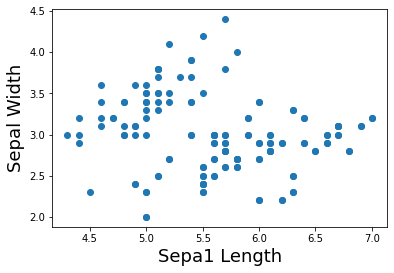

In [ ]:
plt.scatter(TODAS['SL'], TODAS['SW'], cmap='gist_rainbow')
plt.xlabel('Sepa1 Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

Text(0, 0.5, 'Sepal Width')

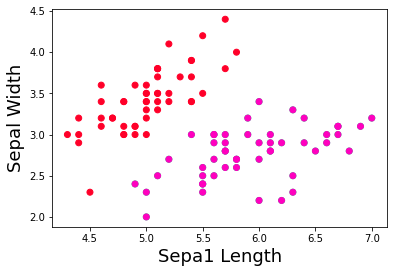

In [ ]:
plt.scatter(TODAS['SL'], TODAS['SW'], c=y, cmap='gist_rainbow') # El parámetro c aplica colores según los índices dados por y
plt.xlabel('Sepa1 Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

<center><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/b/b4/MODOT_W14-7.svg/480px-MODOT_W14-7.svg.png'></center>

# De acá en adelante, **usted** tiene que completar los pasos que le lleven hasta una predicción